# Pymaceuticals Inc.
---

### Analysis

-- In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

-- In this summery we have generated all of the tables and figures needed for the technical report of the clinical study and following are the results.

--The bar graph shows that the Drug Regimen Capomulin has the maximum mice number i.e 230 and Zoniferol has the smaller mice number i.e 182 and by removing the duplicates, new total number of mice are 248.
The total count of mice by gender also showing  124 female mice and 125 male mice.

--2. Its showing strong positive orrelation between mouse weight and average tumor volume, when the mouse weight increases the average tumor volume also increases.

--3. The regression analysis shows that the average tumor volume will change when weight of mice change. The R-squared value is 0.70, which means 70% the model fit the data. 70% the model explains all of the variation in the response variable around its mean.

--4. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = "outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_of_mice = combined_data["Mouse ID"].nunique()
num_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ID) == False]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = clean_mouse_data["Mouse ID"].nunique()
num_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_data = clean_mouse_data.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = drug_regimen_data["Tumor Volume (mm3)"].mean()
median = drug_regimen_data["Tumor Volume (mm3)"].median()
var = drug_regimen_data["Tumor Volume (mm3)"].var()
std = drug_regimen_data["Tumor Volume (mm3)"].std()
sem = drug_regimen_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary_stats = pd.DataFrame({"Mean Tumor Volume" : mean,
                                     "Median Tumor Volume" : median,
                                     "Tumor Volume Variance" : var,
                                     "Tumor Volume Std. Dev." : std,
                                     "Tumor Volume Std. Err." : sem})
regimen_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

aggregation_summary_stats = clean_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregation_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Creating a series to store timepoints
regimen_count = drug_regimen_data["Timepoint"].count()

# Sorting the series in descending order
regimen_count = regimen_count.sort_values(ascending=False)

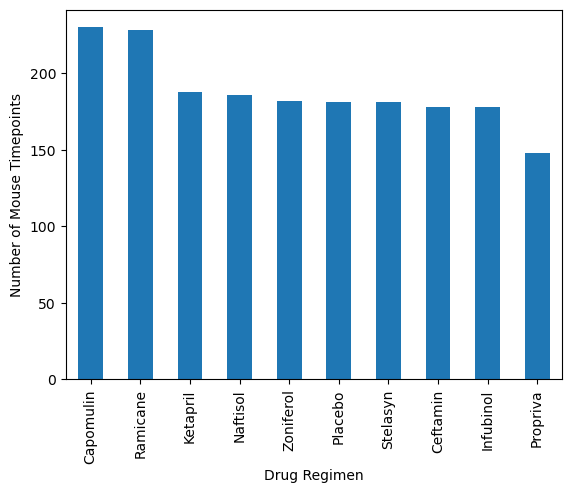

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pandas.
regimen_count_pandas = regimen_count.plot(kind="bar", ylabel = "Number of Mouse Timepoints")
plt.show()

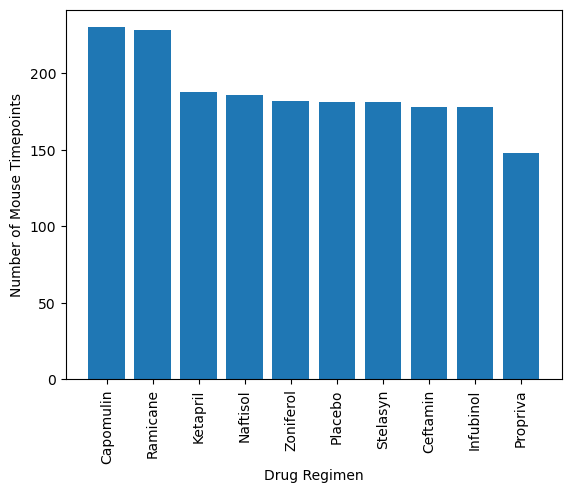

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regiment_count_pyplot = plt.bar(regimen_count.index, regimen_count)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

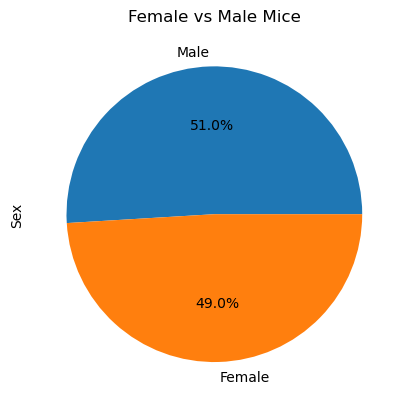

In [12]:
# Creating a series to store gender count
gender_count = clean_mouse_data["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count_pandas = gender_count.plot(kind ="pie", y = gender_count, autopct='%1.1f%%')
plt.title("Female vs Male Mice")
plt.show()


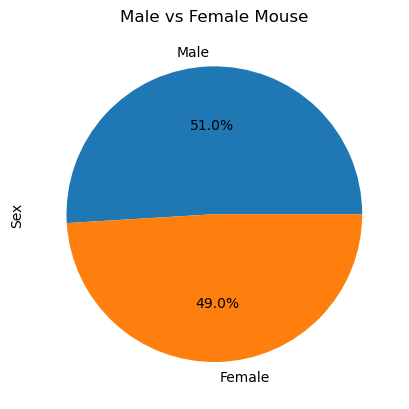

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count_pyplot = plt.pie(gender_count, labels = gender_count.index, autopct="%1.1f%%")
plt.title('Male vs Female Mouse')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data[combined_data["Drug Regimen"].isin(drug_list)]
drugs.head()

In [ ]:
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
for drug in drug_list:
    print(drug)

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

treatments = [0]
tumor_volume = []

for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

    

KeyError: 'Capomulin'

In [ ]:
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


selected_mouse_ID = "l509"

selected_mouse_data = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == selected_mouse_ID]
selected_mouse_data = selected_mouse_data.sort_values("Timepoint")

linechart = plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"])

plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Capomulin"]

avg_capomulin_vol = capomulin_data.groupby(['Mouse ID']).mean()

scatterplot = plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"], color = "blue")

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

x_values = avg_capomulin_vol["Weight (g)"]
y_values = avg_capomulin_vol["Tumor Volume (mm3)"]
regress_values = x_values * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
